# Dimensional analysis

The nearest neighbor approach:
Similarly as in example 2.8, study the following curve:



$$
x_1 = \frac{t \cos t}{1 + t^2}, \quad x_2 = \frac{t \sin t}{1 + t^2}, \quad x_3 = t, \quad -2\pi \leq t \leq 2\pi
$$

In [19]:
import numpy as np
import pandas as pd
def generate_random_numbers_from_these_functions(n = 500, lamb = 0, seed = None):
  if seed:
    np.random.seed(seed)
  theta = np.random.uniform(-2*np.pi, 2*np.pi, n)
  x = (theta*np.cos(theta))/(1+theta**2) + lamb*np.random.uniform(0, 1, n)
  y = (theta*np.sin(theta))/(1+theta**2) + lamb*np.random.uniform(0, 1, n)
  z = theta + lamb*np.random.uniform(0, 1, n)
  df = pd.DataFrame({'x':x, 'y':y, 'z':z})
  return df

df = generate_random_numbers_from_these_functions(seed = 1)
df

,x,y,z
0,-0.251711,0.431514,-1.042732
1,-0.297543,0.116405,2.768679
2,-0.155257,-0.000223,-6.281748
3,0.274183,0.211756,-2.483962
4,0.057887,-0.206433,-4.438996
...,...,...,...
495,0.116779,-0.134623,5.426927
496,0.123673,-0.125652,5.489850
497,-0.082478,-0.203297,4.326978
498,0.098360,-0.154106,5.280471


In [11]:
from matplotlib import pyplot as plt
import plotly.express as px
fig = px.scatter_3d(df, x='x', y='y', z='z', color='z')

fig.show()

a) Use idpettis.m to estimate the intrinsic dim

In [8]:
import pyEDAkit as kit
help(kit.IntrinsicDimensionality.id_pettis)

Help on function id_pettis in module pyEDAkit.IntrinsicDimensionality:

id_pettis(X)
    Estimate the intrinsic dimensionality using the Pettis,
        Bailey, Jain, and Dubes algorithm.

    Parameters:
    X (array): Data matrix.

    Returns:
    float: Estimate of intrinsic dimensionality.



In [12]:
from pyEDAkit.IntrinsicDimensionality import id_pettis

eid = id_pettis(df)
eid

np.float64(1.1185140237063393)

b) Add noise of various sizes to your cuvre and thereafter study the intrinsic dim.

for each point created, add some noise to it ($u$ * $\sigma$)

In [42]:
noised_df_point01 = generate_random_numbers_from_these_functions(lamb = 0.01, seed = 1)
noised_df_point05 = generate_random_numbers_from_these_functions(lamb = 0.05, seed = 1)
noised_df_point1 = generate_random_numbers_from_these_functions(lamb = 0.1, seed = 1)
noised_df_point5 = generate_random_numbers_from_these_functions(lamb = 0.5, seed = 1)
noised_df_point1 = generate_random_numbers_from_these_functions(lamb = 1, seed = 1)
"done"

'done'

In [43]:
# plot these
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=5, specs=[[{'type':'scatter3d'}, {'type':'scatter3d'},
                                            {'type':'scatter3d'}, {'type':'scatter3d'}, {'type':'scatter3d'}]],
                    subplot_titles=("lamb = 0.1", "lamb = 0.5", "lamb = 1", "lamb = 2"))
fig.add_trace(go.Scatter3d(x=noised_df_point01['x'], y=noised_df_point01['y'], z=noised_df_point01['z'],
                             mode='markers', marker=dict(size=2, color=noised_df_point01['z'], colorscale='Viridis')),
              row=1, col=1)
fig.add_trace(go.Scatter3d(x=noised_df_point05['x'], y=noised_df_point05['y'], z=noised_df_point05['z'],
                             mode='markers', marker=dict(size=2, color=noised_df_point05['z'], colorscale='Viridis')),
              row=1, col=2)
fig.add_trace(go.Scatter3d(x=noised_df_point1['x'], y=noised_df_point1['y'], z=noised_df_point1['z'],
                             mode='markers', marker=dict(size=2, color=noised_df_point1['z'], colorscale='Viridis')),
              row=1, col=3)
fig.add_trace(go.Scatter3d(x=noised_df_point5['x'], y=noised_df_point5['y'], z=noised_df_point5['z'],
                             mode='markers', marker=dict(size=2, color=noised_df_point5['z'], colorscale='Viridis')),
              row=1, col=4)
fig.add_trace(go.Scatter3d(x=noised_df_point1['x'], y=noised_df_point1['y'], z=noised_df_point1['z'],
                             mode='markers', marker=dict(size=2, color=noised_df_point1['z'], colorscale='Viridis')),
              row=1, col=5)

fig.update_layout(title_text="3D Scatter Plots with Different Noise Levels")
fig.show()

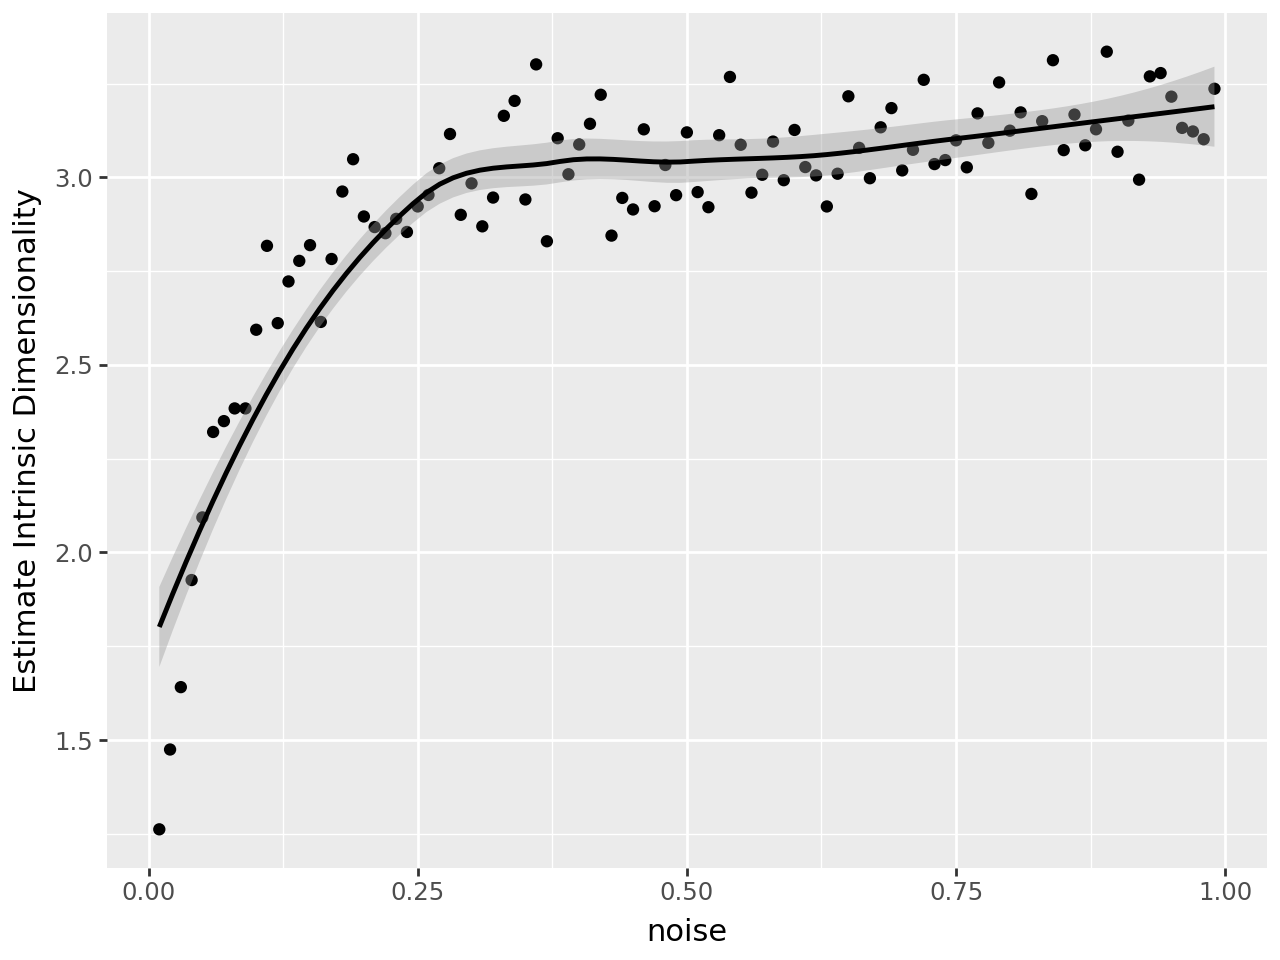

In [50]:
# make from 0.1 to 2 noised dfs and calculate their eid
lambdas = np.array(range(1, 100, 1))*0.01
eids = []
np.random.seed(1)
for lamb in lambdas:
  noised_df = generate_random_numbers_from_these_functions(lamb = lamb)
  eid = id_pettis(noised_df)
  eids.append(eid)
noise_df = pd.DataFrame({'sigma': lambdas, 'eid': eids})
# plot noise_df
from plotnine import *
(
  ggplot(noise_df, aes(x='sigma', y='eid')) 
  + geom_point()
  + geom_smooth(method = "loess")
  + labs(x='noise', y='Estimate Intrinsic Dimensionality')
)

c) Is there any threshold number of noise size for intrinsic dim estimate ?